In [6]:
import pandas as pd

train = pd.read_csv('data/train.csv', sep=';')

In [11]:
train.shape

(5595701, 41)

In [9]:
train.isnull().sum()

ID                              0
First_MAD                       0
SalOrg                          0
DC                              0
Ship_To                         0
ordre                           0
Plant                           0
Material                        0
ItemCat                         0
OrderQty                        0
LT                              1
LogABC                      20938
MOQ                             1
ROP                             1
SafetyStk                       1
PL                              0
MktABC                          0
SubFct                          0
Gross_Weight                    0
Length                          0
Width                           0
Height                          0
Volume                          0
Gamma                           0
Manufacturer                    0
Business                        0
Month                           0
CBO_CBO_Qty_Shortage      2871107
Age_ZN_ZI_years           3741938
DP_FAMILY_CODE

In [83]:
sample = train.sample(100000)

In [103]:
sample.groupby('Material')['OrderQty'].median().to_frame('median')

,median
Material,
00IYcj,1.0
00MFcK,1.0
00Ok8y,1.0
00lqzT,1.0
00mt9e,2.0
01f4Vq,1.0
02Hg4G,1.0
02jRc8,1.0
0355Np,1.0


In [105]:
%time pd.merge(left=sample, right=meds, on='Material')

CPU times: user 537 ms, sys: 60.5 ms, total: 598 ms
Wall time: 600 ms


,ID,First_MAD,SalOrg,DC,Ship_To,ordre,Plant,Material,ItemCat,OrderQty_x,...,Comp_reference_number,Name_Of_Competitor,COMP_PRICE_MIN,COMP_PRICE_AVG,COMP_PRICE_MAX,PRICE,NEAREST_COMP_PRICE_MIN,NEAREST_COMP_PRICE_MAX,date,OrderQty_y
0,3212911,2016-11-18,yqSu,1aVE,EW4oxq,90j3Qt,vP6T,EnjhM5,lvOi,230,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-01,10.0
1,3215261,2013-10-07,yqSu,csdY,rRnUKi,RhRFaN,vP6T,EnjhM5,lvOi,10,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2013-10-01,10.0
2,3218676,2013-05-10,yqSu,1aVE,EW4oxq,6EyV08,vP6T,EnjhM5,lvOi,30,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2013-05-01,10.0
3,3215002,2013-11-21,yqSu,csdY,5RzI8U,1SDnUJ,vP6T,EnjhM5,lvOi,20,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-01,10.0
4,3218558,2014-06-02,yqSu,csdY,5RzI8U,cVSKTw,vP6T,EnjhM5,lvOi,10,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2014-06-01,10.0
5,3213829,2013-05-02,yqSu,TUiR,tdpgNF,mTfjjk,vP6T,EnjhM5,lvOi,30,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2013-05-01,10.0
6,3218766,2014-01-15,yqSu,1aVE,EW4oxq,bXnX9P,vP6T,EnjhM5,lvOi,10,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-01,10.0
7,3215316,2012-10-08,yqSu,csdY,NRORAm,rX7iSf,vP6T,EnjhM5,lvOi,10,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2012-10-01,10.0
8,3215665,2013-04-08,yqSu,csdY,WxIjkK,AXcwW1,vP6T,EnjhM5,lvOi,10,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2013-04-01,10.0
9,3218484,2012-09-03,yqSu,csdY,r6TWZN,mb7qIN,vP6T,EnjhM5,lvOi,30,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2012-09-01,10.0


In [92]:
meds = sample.groupby('Material')['OrderQty'].median().to_frame()

In [93]:
meds

,OrderQty
Material,
00IYcj,1.0
00MFcK,1.0
00Ok8y,1.0
00lqzT,1.0
00mt9e,2.0
01f4Vq,1.0
02Hg4G,1.0
02jRc8,1.0
0355Np,1.0


In [87]:
sample['date'].dt.month

1228064    11
5169134     4
529792      2
57262       8
5053452    12
4382296     9
3788200     3
5513411    10
5040651     2
4633035     8
1793151     5
1493706     6
2786749     3
2606787     6
2459900     2
2735889    12
954736      1
3174532     3
3889070     6
3788003    12
2725207     5
3928483     5
726539     11
1781083     5
4273955     3
2945408     1
3690911     4
1371248     9
4153796     2
1699529     2
           ..
2286895     2
1154201     2
4782075     2
288996      9
5490385    10
5308327    12
1932034     4
1712366    11
2250691    11
3889982     1
997315     11
2420718     6
5406125     1
3782843     3
713971      1
274945      4
5560937     1
2350234    11
4043333    10
5132438    10
3867193     6
3972805     4
738465     11
5048710    12
5149352     1
235301     10
4469881    11
2597179     3
1221679     8
3194834    12
Name: date, Length: 100000, dtype: int64

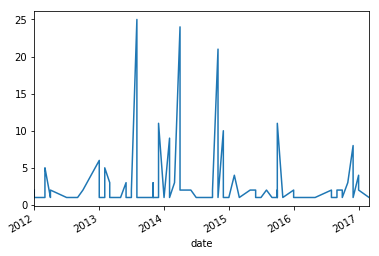

In [78]:
%matplotlib inline

sample[sample['Material'] == sample['Material'].unique()[17]].sort_index()['OrderQty'].plot()

In [8]:
import xam

cont_imp, disc_imp = xam.feature_selection.feature_importance_classification(X_train, y_train['Survived'], random_state=1)

cont_imp.sort_values('f_p_value')

,f_statistic,f_p_value,mutual_information
fare,63.030764,6.120189e-15,0.124183
age,3.761528,5.276069e-02,0.029486


In [10]:
disc_imp.sort_values('chi2_p_value')

,chi2_statistic,chi2_p_value,cramers_v,mutual_information
is_male,260.717020,1.197357e-58,0.540200,0.150870
p_class,102.888989,4.549252e-23,0.336684,0.058107
n_words_in_name,86.921615,5.296551e-16,0.299651,0.049138
family_size,80.672313,3.579669e-14,0.285735,0.047781
sib_sp,37.271793,1.558581e-06,0.187428,0.023197
parch,27.925784,9.703526e-05,0.156934,0.016366


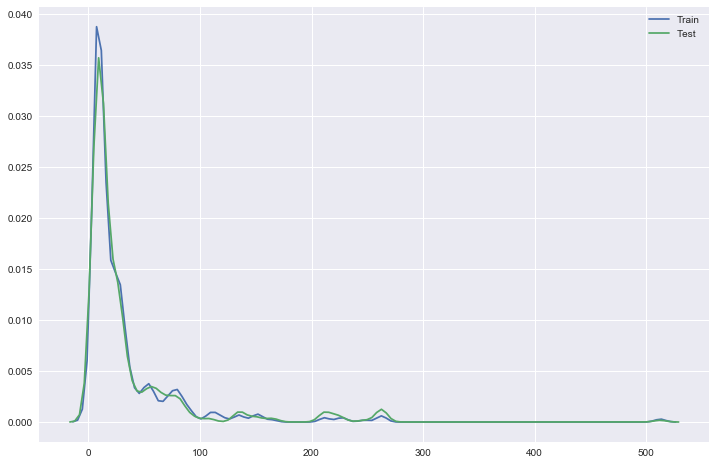

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

fig, ax = plt.subplots(figsize=[12, 8])

sns.kdeplot(X_train['fare'], label='Train', ax=ax)
sns.kdeplot(X_test['fare'], label='Test', ax=ax)
ax.legend();